# Notes on Chapter 7: Matrix Analysis

In [1]:
using FundamentalsNumericalComputation

┌ Info: verify download of index files...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\MatrixDepot.jl:117


┌ Info: reading database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:24
┌ Info: adding metadata...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:68


┌ Info: adding svd data...
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:70
┌ Info: writing database
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\download.jl:75


┌ Info: used remote sites are sparse.tamu.edu with MAT index and math.nist.gov with HTML index
└ @ MatrixDepot C:\Users\rjljr\.julia\packages\MatrixDepot\5VE9J\src\MatrixDepot.jl:119


## 7.1  Intro

This is section just covers the various uses of matrices:

* Tables

* Graphs (adjacency matrices)

* Images


## 7.2 Eigenvalue Decomposition

This is pretty standard treatment.  One new concept is conditioning of eigenvalues:

 **Bauer–Fike theorem**.

Let $\mathbf{A}\in\mathbb{C}^{n\times n}$ be diagonalizable, $\mathbf{A}=\mathbf{V}\mathbf{D}\mathbf{V}^{-1}$, with eigenvalues $\lambda_1,\ldots,\lambda_n$. If $\mu$ is an eigenvalue of $\mathbf{A}+\mathbf{E}$ for a complex matrix $\mathbf{E}$, then

$$
\min_{j=1,\ldots,n} |\mu - \lambda_j| \le \kappa(\mathbf{V}) \, \| \mathbf{E} \|\,,
$$

where $\|\cdot\|$ and $\kappa$ are in the 2-norm.


In [5]:
## Eigenvalues in Julia

A = [2  -1  0; -1  2  -1; 0  -1  2]
ev = eigvals(A)

3-element Vector{Float64}:
 0.585786437626905
 1.9999999999999998
 3.414213562373095

In [19]:
!true

false

In [15]:
[rank(A - evx*I) < rank(A) for evx in ev]

3-element Vector{Bool}:
 1
 1
 1

## 7.3 Singular Value Decomposition


The Singular value decomposition (SVD) of an $m \times n$ matrix $\mathbf{A}$ is a factorization of the form:

$$
\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^*
$$

where $U \in \mathbb{C}^{m \times m}$ and $V \in \mathbb{C}^{n \times n}$ are unitary matrices and $S \in \mathbb{R}^{m \times n}$ is a rectangular diagonal matrix with non-negative real numbers on the diagonal.

 If $\mathbf{A}$ is real, $U$ and $V$ are real orthogonal matrices. The diagonal entries $\sigma_1, ... , \sigma_n$ of $S$ are known as the singular values of $\mathbf{A}$.  

 The singular values are typically ordered from largest to smallest.

 ### Theorem: 

 Every matrix has a singular value decomposition. The signular values are unique, but the singular vectors are not. If $\mathbf{A}$ is real, $U$ and $V$ are real orthogonal matrices.

### Connection to the eigenvalue problem:

The non-zero eigenvalues of $\mathbf{A}^* \mathbf{A}$ are the squares of the singular values of $\mathbf{A}$.

The text also says that 'except for some unimportant technicalities', the eigenvectors of $\mathbf{A}^* \mathbf{A}$ , appropriately ordered and normalized, are the same as the right singular vectors of $\mathbf{A}$.   The left vectors can then be found from  $\mathbf{A} \mathbf{v}_i = \sigma_i \mathbf{u}_i$.


Another close connection comes via the $(m+n)\times(m+n)$ matrix:

$$
\mathbf{C} = \begin{bmatrix} 0 & \mathbf{A}^* \\ \mathbf{A} & 0 \end{bmatrix}

$$

The eigenvalues of $\mathbf{C}$ come in pairs $\pm \sigma_i$ and the eigenvectors 'reveal' a left and right singular vector.  This is implicitly exploited by software to compute the SVD

### Exercise  7.3.11

Suppose $\mathbf{A}\in\mathbb{R}^{m \times n}$, and define $\mathbf{C}$ as in above. 

**(a)** Suppose that $\mathbf{v}=\begin{bmatrix} \mathbf{x} \\ \mathbf{y} \end{bmatrix}$, and write the block equation $\mathbf{C}\mathbf{v} = \lambda \mathbf{v}$ as two individual equations involving both $\mathbf{x}$ and $\mathbf{y}$.

By inspection, the two equations are:
$$
\mathbf{A}\mathbf{x} = \lambda \mathbf{y} \quad \text{and} \quad \mathbf{A}^T\mathbf{y} = \lambda \mathbf{x}
$$

**(b)** By applying some substitutions, rewrite the equations from part (a) as one in which $\mathbf{x}$ was eliminated, and another in which $\mathbf{y}$ was eliminated.

This yields, by substitution:
$$
\mathbf{A}^T\mathbf{A}\mathbf{y} = \lambda^2 \mathbf{y} \quad \text{and} \quad \mathbf{A}\mathbf{A}^T\mathbf{x} = \lambda^2 \mathbf{x}
$$

**(c)** Substitute the SVD $\mathbf{A}=\mathbf{U}\mathbf{S}\mathbf{V}^T$ and explain why $\lambda^2=\sigma_k^2$ for some singular value $\sigma_k$. 

Substituting the SVD into the equations from part (b) yields:

$$
\mathbf{U}\mathbf{S}\mathbf{S}^T\mathbf{U}^T\mathbf{y} = \lambda^2 \mathbf{y} \quad \text{and} \quad \mathbf{V}\mathbf{S}^T\mathbf{S}\mathbf{V}^T\mathbf{x} = \lambda^2 \mathbf{x}
$$

In both cases, the matrices are all square now. In the first case we have $m \times m$ matrices and the second case $n \times n$.  So these express simularity relationships and so the eigenvalues $\lambda^2$ can be identified with $\sigma_k^2$  If $m>n$ then the first equation will necessarily have $m-n$ zero eigenvalues.  If $m<n$ then the second equation will have $n-m$ zero eigenvalues.  If $m=n$ then the two equations are equivalent.

**(d)** As a more advanced variation, modify the argument to show that $\lambda=0$ is another possibility if $\mathbf{A}$ is not square.

See above.

### Interpreting the SVD

The SVD can be interpreted as a rotation, followed by a scaling, followed by another rotation.  The first rotation is given by $\mathbf{V}^T$ and the second by $\mathbf{U}$.  The scaling is given by $\mathbf{S}$.  

The SVD sacrifices having the same basis for the domain and range of $\mathbf{A}$, but it does have the advantage of having an orthogonal transformation for both the domain and range.  (Compared to EVD)

### Thin Form

Suppose $m \ge n$.  Then the SVD can be written in the 'thin' form:
$$
\mathbf{A} = \hat{\mathbf{U}}  \hat{\mathbf{S}} \mathbf{V}^T
$$
where $\hat{\mathbf{S}}$ is $n \times n$ and $\hat{\mathbf{U}}$ is $m \times n$. This is acheived by dropping the zero rows of $S$ and the corresponding columns of $U$.

### SVD and the 2 norm

Theorem:

1. Let $\mathbf{A}$ have SVD $\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^T$.  Then $\|\mathbf{A}\|_2 = \sigma_1$ 

2. The rank of $\mathbf{A}$ is the number of non-zero singular values.

3. Let $r = min\{m,n\}$. Then the condition number of $\mathbf{A}$ is $\kappa_2(\mathbf{A}) = \sigma_1 / \sigma_r$.

## 7.4 Symmetry and definiteness

### Spectral Decomposition Theorem: 
If $\mathbf{A} = \mathbf{A}^*$ (i.e. the matrix is Hermitian), then is  $\mathbf{A}$ is orthogonally diagonalizable, and all eigenvalues are real.  i.e.  $\mathbf{A} = \mathbf{V}\mathbf{D}\mathbf{V}^*$ where $\mathbf{V}$ is unitary and $\mathbf{D}$ is real diagonal.


A Normal matrix is one that commutes with its adjoint, i.e. $\mathbf{A}\mathbf{A}^* = \mathbf{A}^*\mathbf{A}$ , and it can be shown that such matrices are unitarily similar to a diagonal matrix.)

If the eigenvalues of a Normal matrix are real, it is Hermitian

### SVD of a Hermitian matrix:

If $\mathbf{A}$ is Hermitian and
$$
\mathbf{A} = \mathbf{V}\mathbf{D}\mathbf{V}^*
$$

Then:
$$
\mathbf{A} = (\mathbf{VT})|\mathbf{D}|\mathbf{V}^*
$$
is an SVD of $A$.  $\mathbf{T}$ is a diagonal with $|T_{ii}| = 1$  for all $i$.

### Rayleigh quotient:

Given hermitian $\mathbf{A}$ and a nonzero vector $\mathbf{x}$, the Rayleigh quotient is defined as:
$$
R_A(\mathbf{x}) = \frac{\mathbf{x}^*\mathbf{A}\mathbf{x}}{\mathbf{x}^*\mathbf{x}}
$$

* If $\mathbf{x}$ is an eigenvector of $\mathbf{A}$, then $R(\mathbf{x}) = \lambda$.

* $\nabla R_A(\mathbf{v}) = 0 $ if  $\mathbf{v}$ is an eigenvector.  This is a useful property for finding eigenvalues, because:

$$
R_A(\mathbf{v} + \epsilon \mathbf{z}) = R_A(\mathbf{v}) +   \mathcal{O}(\epsilon^2)
$$

So a good estimate of an eigenvector becomes an even better estimate of the eigenvalue.

### More definitions

symmetric positive definite (SPD) matrix:  $\mathbf{A} = \mathbf{A}^T$ and $\mathbf{x}^T\mathbf{A}\mathbf{x} > 0$ for all $\mathbf{x} \ne 0$.

hermitian positive definite (HPD) matrix: $\mathbf{A} = \mathbf{A}^*$ and $\mathbf{x}^*\mathbf{A}\mathbf{x} > 0$ for all $\mathbf{x} \ne 0$.

Similarly you can define semi-definite and negative definite. (i.e. $\ge 0$ and $< 0$ respectively)


#### Theorem:

$\mathbf{A}$ is HPD if and only if all eigenvalues are positive.

SImilar statements hold for semi-definite and negative definite. 




### Exercise 7.4.2
 Determine whether each matrix is positive definite, negative definite, positive or negative semidefinite, or indefinite.

(a) matrixdepot("pei",5)-6I

(b) matrixdepot("hilb",8)-2I

(c) matrixdepot("dingdong",20)

(d) matrixdepot("lehmer",100)

(e) matrixdepot("fiedler",200)


In [3]:
matA = matrixdepot("pei",5)- 6I

5×5 Matrix{Float64}:
 -4.0   1.0   1.0   1.0   1.0
  1.0  -4.0   1.0   1.0   1.0
  1.0   1.0  -4.0   1.0   1.0
  1.0   1.0   1.0  -4.0   1.0
  1.0   1.0   1.0   1.0  -4.0

In [4]:
eigvals(matA)

5-element Vector{Float64}:
 -5.0
 -5.0
 -5.0
 -5.0
  0.0

THe matrix is symmetric by inspection, and is negative semi-definite by looking at the eigenvalues.

In [5]:
matB = matrixdepot("hilb",8)-2I

8×8 Matrix{Float64}:
 -1.0        0.5        0.333333  …   0.166667    0.142857    0.125
  0.5       -1.66667    0.25          0.142857    0.125       0.111111
  0.333333   0.25      -1.8           0.125       0.111111    0.1
  0.25       0.2        0.166667      0.111111    0.1         0.0909091
  0.2        0.166667   0.142857      0.1         0.0909091   0.0833333
  0.166667   0.142857   0.125     …  -1.90909     0.0833333   0.0769231
  0.142857   0.125      0.111111      0.0833333  -1.92308     0.0714286
  0.125      0.111111   0.1           0.0769231   0.0714286  -1.93333

In [9]:
sum(matB - matB')

0.0

In [10]:
eigvals(matB)

8-element Vector{Float64}:
 -1.9999999998888458
 -1.9999999820112628
 -1.9999987056679087
 -1.9999456305663017
 -1.9985323118822582
 -1.97378715642188
 -1.7018747886830694
 -0.30406100307805134

symmetric negative definite

In [11]:
matE = matrixdepot("fiedler",200)

200×200 Matrix{Float64}:
   0.0    1.0    2.0    3.0    4.0  …  195.0  196.0  197.0  198.0  199.0
   1.0    0.0    1.0    2.0    3.0     194.0  195.0  196.0  197.0  198.0
   2.0    1.0    0.0    1.0    2.0     193.0  194.0  195.0  196.0  197.0
   3.0    2.0    1.0    0.0    1.0     192.0  193.0  194.0  195.0  196.0
   4.0    3.0    2.0    1.0    0.0     191.0  192.0  193.0  194.0  195.0
   5.0    4.0    3.0    2.0    1.0  …  190.0  191.0  192.0  193.0  194.0
   6.0    5.0    4.0    3.0    2.0     189.0  190.0  191.0  192.0  193.0
   7.0    6.0    5.0    4.0    3.0     188.0  189.0  190.0  191.0  192.0
   8.0    7.0    6.0    5.0    4.0     187.0  188.0  189.0  190.0  191.0
   9.0    8.0    7.0    6.0    5.0     186.0  187.0  188.0  189.0  190.0
   ⋮                                ⋱    ⋮                         
 191.0  190.0  189.0  188.0  187.0       4.0    5.0    6.0    7.0    8.0
 192.0  191.0  190.0  189.0  188.0       3.0    4.0    5.0    6.0    7.0
 193.0  192.0  191.0  190.0  18

In [31]:
print(sum(matE- matE'))
eigensign = sign.(eigvals(matE))
print("number greater than zero: $(size(eigensign[eigensign .> 0])[1])\n")
print("number less than zero: $(size(eigensign[eigensign .< 0])[1])")

0.0

number greater than zero: 1
number less than zero: 199

Indefinite

## 7.5 Dimension reduction

Let $\mathbf{A}$ be an $m \times n$ matrix of rank $r$ and SVD $\mathbf{A} = \mathbf{U}\mathbf{S}\mathbf{V}^T$.  Then it can be shown that $\mathbf{A}$ can be written:

$$
\mathbf{A} = \sum_{i=1}^r \sigma_i \mathbf{u}_{i}\mathbf{v}_{i}^T
$$

Here the $\mathbf{u}_i$ are the left singular vectors and the $\mathbf{v}_i$ are the right singular vectors.  The $\sigma_i$ are the singular values.

Define:

$$
\mathbf{A}_k = \sum_{i=1}^k \sigma_i \mathbf{u}_{i}\mathbf{v}_{i}^T = \mathbf{U}_k \mathbf{S}_k \mathbf{V}_k^T,
$$

where $\mathbf{U}_k$ is the first $k$ columns of $\mathbf{U}$,  $\mathbf{V}_k$ is the first $k$ columns of $\mathbf{V}$. $\mathbf{S}_k$ is the upper left $k \times k$ submatrix of $\mathbf{S}$ 

$\mathbf{A}_k$ is the best rank-$k$ approximation to $\mathbf{A}$ in the 2-norm.

Theorem:
With $\mathbf{A}$ defined as above:

$$
\| \mathbf{A} - \mathbf{A}_k \|_2 = \sigma_{k+1}
$$

and if the rank of $\mathbf{B}$ is $k$ or less, then $\| \mathbf{A} - \mathbf{B} \|_2 \ge \sigma_{k+1}$.



If the singular values of $\mathbf{A}$ decay rapidly, then $\mathbf{A}_k$ is a good approximation to $\mathbf{A}$ and can be used to reduce the dimensionality of a problem

### Exercise 7.5.5

Following Demo 7.5.2 as a guide, load the “mandrill” test image and convert it to a matrix of floating-point pixel grayscale intensities. Using the SVD, display as images the best approximations of rank 5, 10, 15, and 20

┌ Warning: "mandril_gray.tiff" not found in `TestImages.remotefiles`. Load "mandril_gray.tif" instead.
└ @ TestImages C:\Users\rjljr\.julia\packages\TestImages\rDCtu\src\TestImages.jl:164


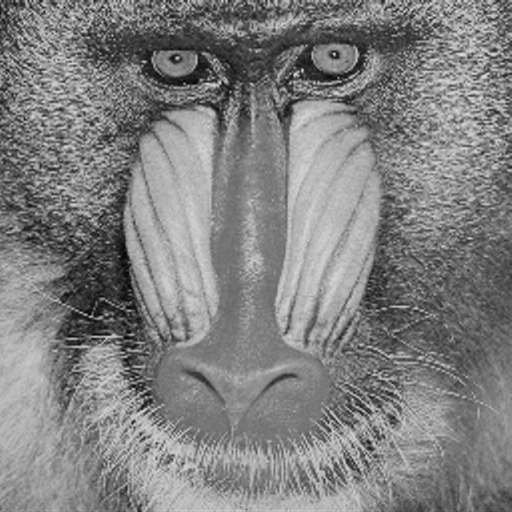

In [41]:
mandrill = testimage("mandril_gray.tiff")  # cheater ;)

In [35]:
size(mandrill)

(512, 512)

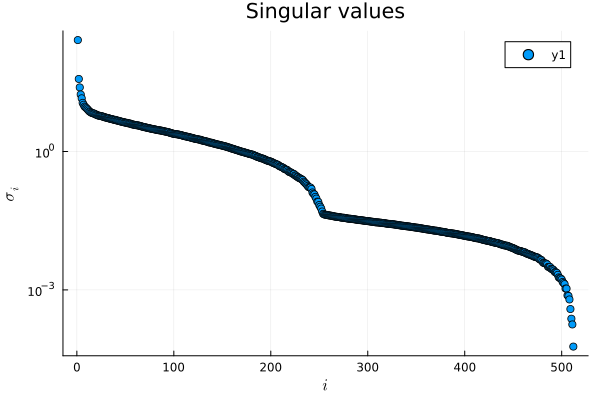

In [43]:
U,s,V = svd(mandrill)
scatter(s,xaxis=(L"i"), yaxis=(:log10,L"\sigma_i"),
    title="Singular values")

In [55]:
function plot_rankn(n)
    A = U[:,1:n]*diagm(s[1:n])*V[:,1:n]'
    return plot(Gray.(A),frame=:none,aspect_ratio=1,title="rank = $n")
end

plot_rankn (generic function with 1 method)

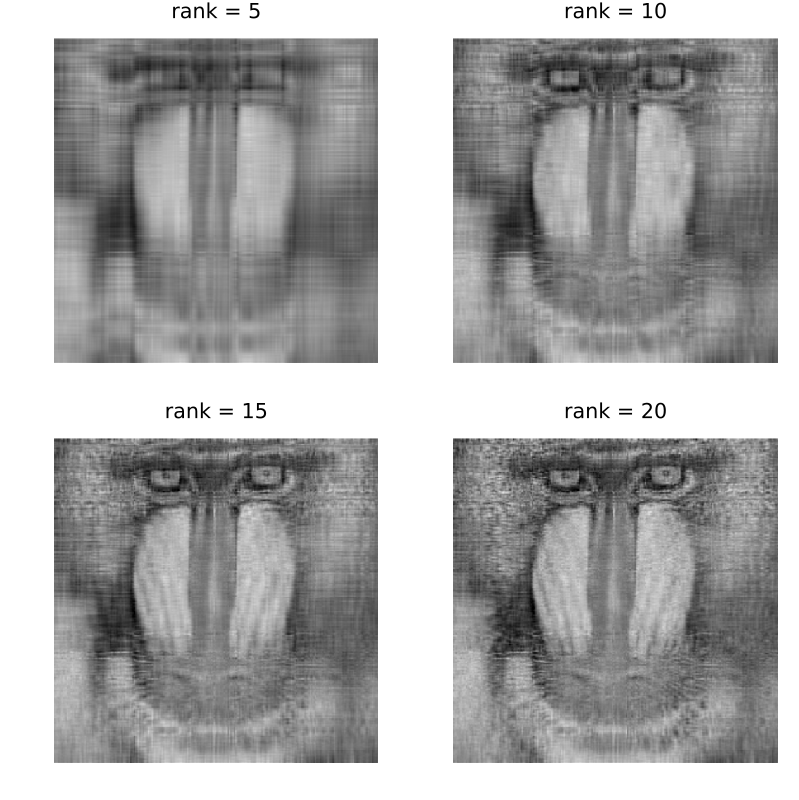

In [59]:
plot(map(plot_rankn, [5,10,15,20])...,
    layout=(2,2),size=(800,800))

Looking at the plot, it seems most of the data is in the first 100 or 200 , so we can try those.

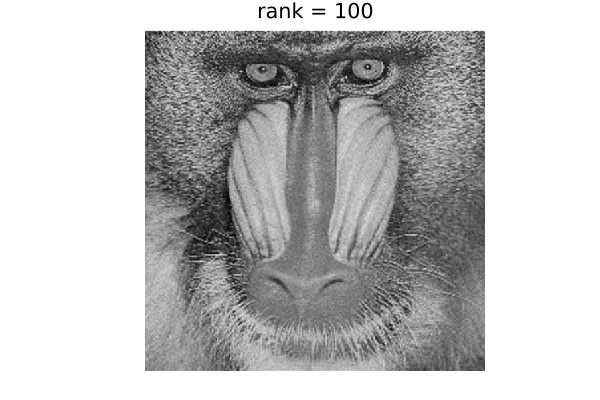

In [56]:
plot_rankn(100)

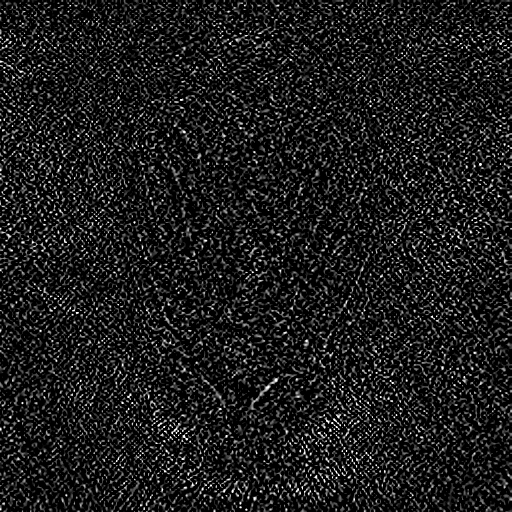

In [79]:
n= 100
test = (U[:,1:n]*diagm(s[1:n])*V[:,1:n]' - mandrill)*10